In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,RMSprop,SGD

In [3]:
df=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\Alphabets_data.csv")

In [4]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
X=df.drop('letter',axis=1)
Y=df[['letter']]

In [6]:
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
Y

,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(Y.values.reshape(-1, 1))
y_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [16]:
model =Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))  # Input layer
model.add(layers.Dense(64, activation='relu'))                   # Hidden layer 1
model.add(layers.Dense(32, activation='relu'))                   # Hidden layer 2
model.add(layers.Dense(y_onehot.shape[1], activation='softmax'))  # Output layer


C:\Users\abhishekgh\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2068 - loss: 3.0199 - val_accuracy: 0.5978 - val_loss: 1.4171
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6477 - loss: 1.2746 - val_accuracy: 0.7185 - val_loss: 1.0427
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7168 - loss: 1.0123 - val_accuracy: 0.7452 - val_loss: 0.9234
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7480 - loss: 0.8993 - val_accuracy: 0.7797 - val_loss: 0.8285
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7708 - loss: 0.8205 - val_accuracy: 0.7890 - val_loss: 0.7660
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.7708 - val_accuracy: 0.7763 - val_loss: 0.7634
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.7119 - val_accuracy: 0.7803 - val_loss: 0.7272
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8055 - loss: 0.6742 - val_accuracy: 0.

In [25]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9072 - loss: 0.2767
Validation Accuracy: 0.9105


In [27]:
predictions = model.predict(X_val)  # Predict on validation set

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
predicted_classes = encoder.inverse_transform(predictions)  # Get class labels
print(predicted_classes)

[['Z']
 ['R']
 ['A']
 ...
 ['Q']
 ['Y']
 ['Y']]


## Evaluation

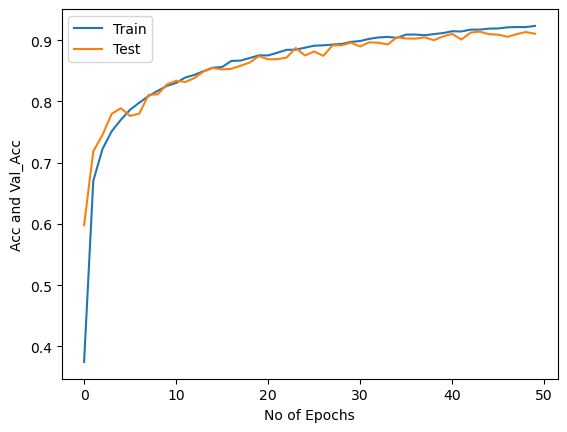

In [31]:
plt.plot(range(50),history.history['accuracy'],label='Train')
plt.plot(range(50),history.history['val_accuracy'],label='Test')
plt.legend(loc='best')
plt.xlabel('No of Epochs')
plt.ylabel('Acc and Val_Acc');

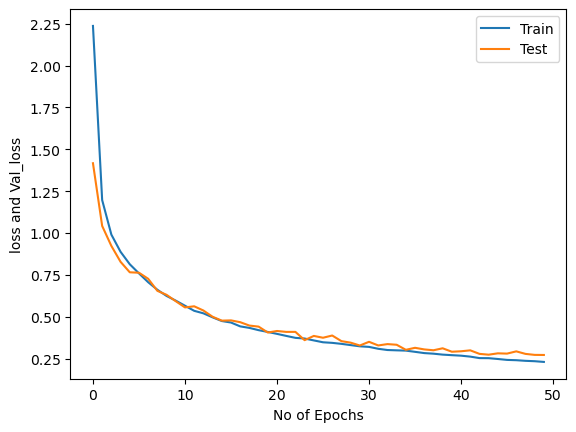

In [33]:
plt.plot(range(50),history.history['loss'],label='Train')
plt.plot(range(50),history.history['val_loss'],label='Test')
plt.legend(loc='best')
plt.xlabel('No of Epochs')
plt.ylabel('loss and Val_loss');

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning

1. Learning Rate:

Default: Often set to a standard value (e.g., 0.01). This can be too high or too low, causing the model to converge slowly or overshoot minima.

Tuned: A well-adjusted learning rate can significantly accelerate convergence, allowing the model to reach optimal weights more effectively.

2. Number of Layers and Neurons:

Default: May use a simple architecture (e.g., a few layers with a standard number of neurons).

Tuned: By experimenting with more layers or varying neuron counts, the model can learn more complex patterns, improving accuracy, especially in tasks with intricate relationships.

3. Activation Functions:

Default: Typically employs common functions like ReLU or sigmoid.

Tuned: Choosing the right activation function can impact gradient flow. For instance, using Leaky ReLU or Swish may help mitigate issues like the vanishing gradient problem, leading to better performance.


4. Optimizer Choice:

Default: Frequently defaults to Stochastic Gradient Descent (SGD).

Tuned: Using advanced optimizers like Adam or RMSprop can enhance convergence speed and stability, as they adapt learning rates based on gradients

5. Epochs:

Default: Often a fixed number without consideration of convergence.

Tuned: By using early stopping based on validation performance, a tuned model can avoid overfitting while ensuring sufficient training.